 ### <center> Homework Assignment 8 </center>


$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

Héctor Andrade Loarca # 375708 

Melf Boeckel # 543098

Wavelets Filters
----------------
The 2-D wavelet transform of a continuous image $f(x)$ computes the set
of inner products
$$ d_j^k[n] = \dotp{f}{\psi_{j,n}^k} $$
for scales $ j \in \ZZ
$, position $ n \in \ZZ^2 $ and orientation $ k \in \{H,V,D\} $.


The wavelet atoms are defined by scaling and translating three mother
atoms $ \{\psi^H,\psi^V,\psi^D\} $:
$$ \psi_{j,n}^k(x) = \frac{1}{2^j}\psi^k\pa{\frac{x-2^j n}{2^j}}  $$
These oriented wavelets are defined by a tensor product of a 1-D wavelet
function $\psi(t)$ and a 1-D scaling function $\phi(t)$
$$ \psi^H(x)=\phi(x_1)\psi(x_2), \quad  \psi^V(x)=\psi(x_1)\phi(x_2)
\qandq \psi^D(x)=\psi(x_1)\psi(x_2).$$


The fast wavelet transform algorithm does not make use of the wavelet and scaling functions,
but of the filters $h$ and $g$ that caracterize their interaction:
$$ g[n] = \frac{1}{\sqrt{2}}\dotp{\psi(t/2)}{\phi(t-n)}
\qandq h[n] = \frac{1}{\sqrt{2}}\dotp{\phi(t/2)}{\phi(t-n)}. $$


The simplest filters are the Haar filters
$$ h = [1, 1]/\sqrt{2} \qandq g = [-1, 1]/\sqrt{2}. $$


Daubechies wavelets extends the haar wavelets by using longer
filters, that produce smoother scaling functions and wavelets.
Furthermore, the larger the size $p=2k$ of the filter, the higher is the number
$k$ of vanishing moment.


A high number of vanishing moments allows to better compress regular
parts of the signal. However, increasing the number of vanishing moments
also inceases the size of the support of the wavelets, wich can be
problematic in part where the signal is singular (for instance
discontinuous).


Choosing the _best_ wavelet, and thus choosing $k$, that is adapted to a
given class of signals, thus corresponds to
a tradeoff between efficiency in regular and singular parts.


* The filter with $k=1$ vanishing moments corresponds to the Haar filter.
* The filter with $k=2$ vanishing moments corresponds to the famous |D4| wavelet, which compresses perfectly linear signals.
* The filter with $k=3$ vanishing moments compresses perfectly quadratic signals.


Set the support size.
To begin, we select the D4 filter.

We first imporant some functions of the toolbox (that I implemented for Shearlab in julia already and I think are well documented) and some libraries that will help us that will let us import the picture correctly

In [1]:
using Autoreload
arequire("nt_toolbox/nt_signal.jl")
arequire("nt_toolbox/nt_general.jl")
using nt_signal
using nt_general
using PyPlot
using Wavelets

INFO: Loading help data...


As the wavelets.jl library is not yet understendable for me I will just use it to generate the filters automatically, we will use it just to generate Daubechies 4 filters

In [2]:
p = 4;

Create the low pass filter $h$ and the high pass $g$. We add a zero to ensure that it has a odd
length. Note that the central value of $h$ corresponds to the 0 position.

In [3]:
wavelet(WT.db2)

OrthoFilter{PerBoundary}([0.482963,0.836516,0.224144,-0.12941],"db2")

In [4]:
h = [0, .482962913145, .836516303738, .224143868042, -.129409522551];
h = h/norm(h);
g = cat(1, 0, h[length(h):-1:2]) .* ( (-1).^(1:length(h)) );

Lets visualize the filter

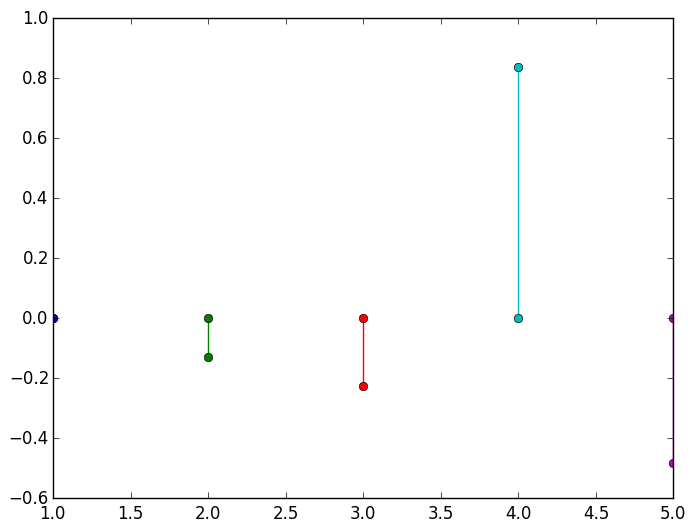

In [5]:
for i in 2:(length(h)+1)
    plot([i-1,i-1],[0,g[i-1]],"-o")
end

Note that the high pass filter $g$ is computed directly from the low
pass filter as:
$$g[n] = (-1)^{1-n}h[1-n]$$


Display.

In [6]:
println("h filter = ", h);
println("g filter = ", g);

h filter = [0.0,0.48296291314483153,0.8365163037377082,0.22414386804192182,-0.12940952255095486]
g filter = [-0.0,-0.12940952255095486,-0.22414386804192182,0.8365163037377082,-0.48296291314483153]


Up and Down Filtering
---------------------
The basic wavelet operation is low/high filtering, followed by down
sampling.


Starting from some 1-D signal $f \in \RR^N$, one thus compute the
low pass signal $a \in \RR^{N/2}$ and the high pass
signal $d \in \RR^{N/2}$ as
$$ a = (f \star h) \downarrow 2 \qandq
d = (f \star g) \downarrow 2$$
where the sub-sampling is defined as
$$ (u \downarrow 2)[k] = u[2k]. $$


Create a random signal $f \in \RR^N$.

In [7]:
N = 1024;
f = rand(N,1);

Low/High pass filtering followed by sub-sampling.

In [8]:
a = subsampling( cconvol(f,h) );
d = subsampling( cconvol(f,g) );

For orthogonal filters, the reverse of this process is its dual
(aka its transpose), which is upsampling followed by low/high pass
filtering with the reversed filters and summing:
$$ (a \uparrow 2) \star \tilde h + (d \uparrow 2) \star \tilde g = f $$
where $\tilde h[n]=h[-n]$ (computed modulo $N$) and
$ (u \uparrow 2)[2n]=u[n] $ and  $ (u \uparrow 2)[2n+1]=0 $.

Test for energy conservation.

In [9]:
e0 = norm(f[:])^2;
e1 = norm(a[:])^2 + norm(d[:])^2;
println("Energy before : $e0");
println("Energy before : $e1");

Energy before : 324.4892711476667
Energy before : 324.48927114780787


Up-sampling followed by filtering.

In [10]:
f1 =  cconvol(upsampling(a),reverse(h)) + cconvol(upsampling(d),reverse(g));

Check that we really recover the same signal.

In [11]:
println("Error |f-f1|/|f| = ", norm(f[:]-f1[:])/norm(f[:]) );

Error |f-f1|/|f| = 5.44885119302355e-13


Forward 2-D Wavelet transform
-----------------------------
The set of wavelet coefficients are computed with a fast algorithm that
exploit the embedding of the approximation spaces $V_j$ spanned by the
scaling function $ \{ \phi_{j,n} \}_n $ defined as
$$ \phi_{j,n}(x) = \frac{1}{2^j}\phi^0\pa{\frac{x-2^j n}{2^j}}
\qwhereq \phi^0(x)=\phi(x_1)\phi(x_2). $$


The wavelet transform of $f$ is computed by using intermediate discretized low
resolution images obtained by projection on the spaces $V_j$:
$$ a_j[n] = \dotp{f}{\phi_{j,n}}. $$


First we load an image of $N= n \times n$ pixels, that for the first case is a picture of the accelerator Bessy II that I took last saturday in "Lange Nacht der Wissenschaft" in Helmholtz Zentrum Berlin

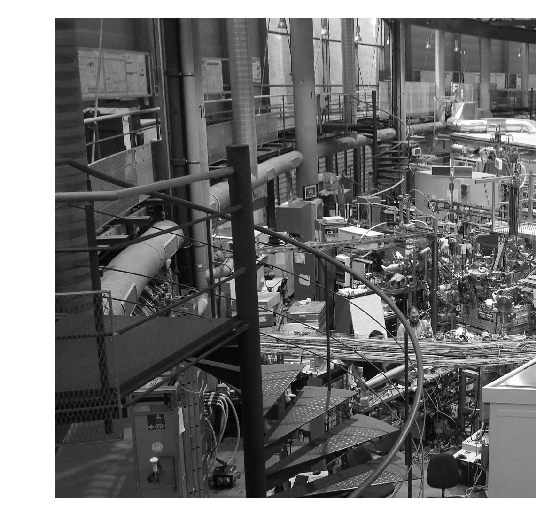

In [12]:
n = 1024;
name = "nt_toolbox/data/bessyii.bmp";
f = load_image(name, N);
f = rescale(sum(f,3));
f = f[:,:,1];
imageplot(f);

The algorithm starts at the coarsest scale $ j=\log_2(n)-1 $

In [13]:
j = log2(n)-1;

The first step of the algorithm perform filtering/downsampling in the
horizontal direction.


$$ \tilde a_{j-1} = (a_j \star^H h) \downarrow^{2,H}  \qandq
   \tilde d_{j-1} = (a_j \star^H g) \downarrow^{2,H}$$


Here, the operator $\star^H$ and $\downarrow^{2,H}$
are defined by applying $\star$ and $\downarrow^2$
to each column of the matrix.


The second step computes the filtering/downsampling in the vertical
direction.


$$ a_{j-1}   = (\tilde a_j \star^V h) \downarrow^{2,V}  \qandq
   d_{j-1}^V = (\tilde a_j \star^V g) \downarrow^{2,V},$$
$$ d_{j-1}^H = (\tilde d_j \star^V h) \downarrow^{2,V}  \qandq
   d_{j-1}^D = (\tilde d_j \star^V g) \downarrow^{2,V}.$$



A wavelet transform is
computed by iterating high pass and loss pass filterings with |h| and |g|, followed by sub-samplings.
Since we are in 2-D, we need to compute these filterings+subsamplings
in the horizontal and then in the vertical direction (or
in the reverse order, it does not mind).



Initialize the transformed coefficients as the image itself and set the
initial scale as the maximum one.
|fW| will be iteratively transformated and will contains the
coefficients.

In [14]:
fW = copy(f);

Select the sub-part of the image to transform.

In [15]:
A = fW[1:2^(j+1),1:2^(j+1)];
B = fW[1:2^(j+1),1:2^(j+1)];

Apply high and low filtering+subsampling in the vertical direction (1st coordinate),
to get coarse and details.

Apply high and low filtering+subsampling in the horizontal direction (2nd coordinate),
to get coarse and details.

In [16]:
Coarse = subsampling(cconvol(A,h,1),1);
Detail = subsampling(cconvol(A,g,1),1);

In [17]:
Coarse2 = subsampling(cconvol(B,h,2),2);
Detail2 = subsampling(cconvol(B,g,2),2);

Check for energy conservation.

In [18]:
norm(A[:])^2 - norm(Coarse[:])^2 - norm(Detail[:])^2

-9.077916729438584e-8

In [19]:
norm(B[:])^2 - norm(Coarse[:])^2 - norm(Detail[:])^2

-9.077916729438584e-8

_Note:_ |subsamplling(A,1)| is equivalent to |A(1:2:end,:)| and
|subsamplling(A,2)| is equivalent to |A(:,1:2:end)|.


Concatenate them in the vertical direction to get the result.

In [20]:
A = cat(1, Coarse, Detail );
B= cat(1, Coarse2, Detail2 );

Display the result of the vertical transform.

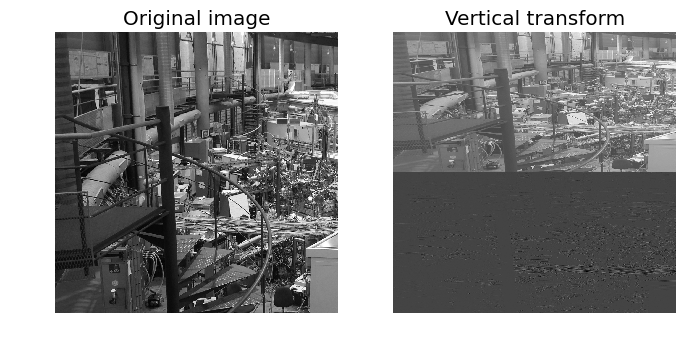

In [21]:
clf;
imageplot(f,"Original image",1,2,1);
imageplot(A,"Vertical transform",1,2,2);

Display the result of the vertical transform.

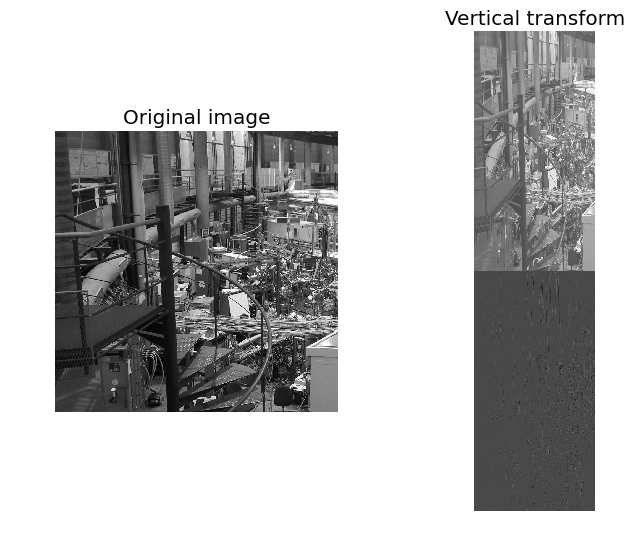

In [22]:
clf;
imageplot(f,"Original image",1,2,1);
imageplot(B,"Vertical transform",1,2,2);

Apply high and low filtering+subsampling in the horizontal direction (2nd coordinate),
to get coarse and details.

In [23]:
Coarse = subsampling(cconvol(A,h,2),2);
Detail = subsampling(cconvol(A,g,2),2);

Concatenate them in the horizontal direction to get the result.

In [24]:
A = cat(2, Coarse, Detail );

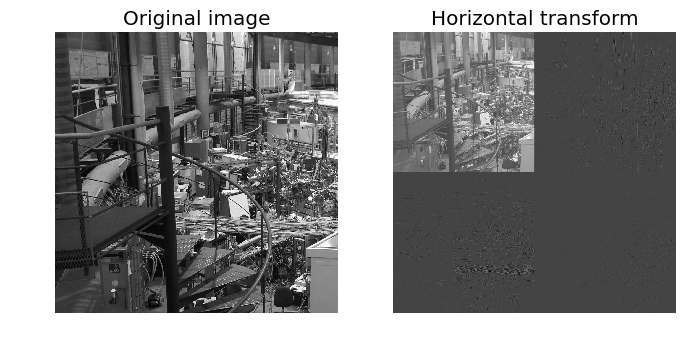

In [25]:
clf;
imageplot(f,"Original image",1,2,1);
imageplot(A,"Horizontal transform",1,2,2);

Assign the transformed data.

In [26]:
fW[1:2^(j+1),1:2^(j+1)] = A;

Display the result of the horizontal transform.

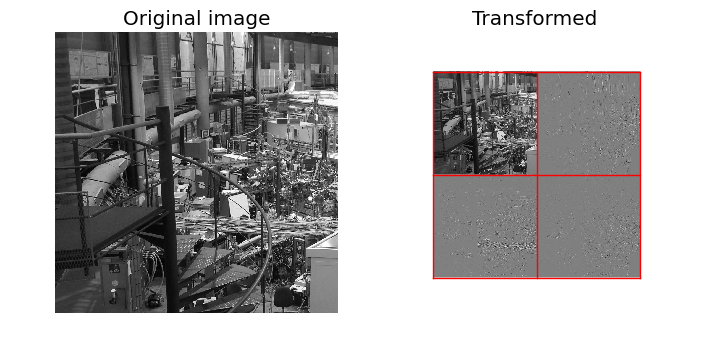

In [27]:
clf;
imageplot(f,"Original image",1,2,1);
subplot(1,2,2);
plot_wavelet(fW,log2(n)-1); 
title("Transformed");

In [28]:
print( norm(f[:])-norm(fW[:]) )

-2.25611529458547e-10

Now lets Implement a full wavelet transform that extract iteratively wavelet
coefficients, by repeating these steps. Take care of choosing the
correct number of steps.

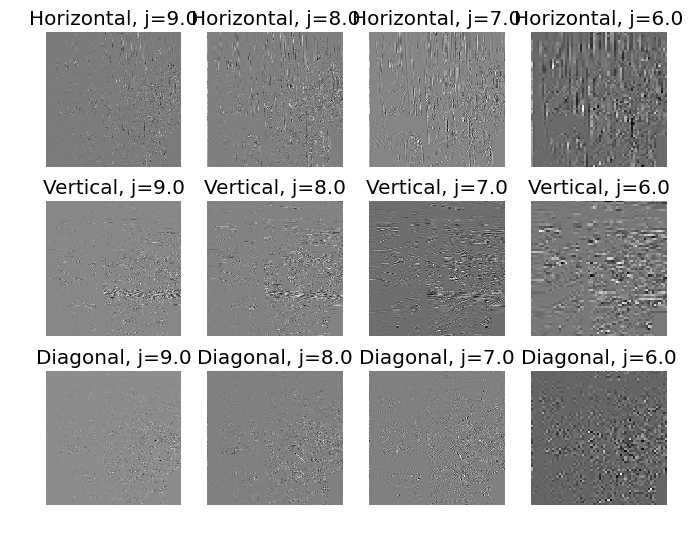

In [29]:
Jmax = log2(n)-1;
Jmin = 1;
fW = copy(f);
clf;
for j=Jmax:-1:Jmin
    A = fW[1:2^(j+1),1:2^(j+1)];
    for d=1:2
        Coarse = subsampling(cconvol(A,h,d),d);
        Detail = subsampling(cconvol(A,g,d),d);
        A = cat(d, Coarse, Detail );
    end
    fW[1:2^(j+1),1:2^(j+1)] = A;
    j1 = Jmax-j;
    if j1<4
        imageplot(A[1:2^j,2^j+1:2^(j+1)], "Horizontal, j=$j", 3,4, j1 + 1);
        imageplot(A[2^j+1:2^(j+1),1:2^j], "Vertical, j=$j", 3,4, j1 + 5);
        imageplot(A[2^j+1:2^(j+1),2^j+1:2^(j+1)], "Diagonal, j=$j", 3,4, j1 + 9);
    end
end

Check for orthogonality of the transform (conservation of energy).

In [30]:
e0 = norm(f[:])^2; 
e1 = norm(fW[:])^2; 
println("Energy of the signal       = $e0");
println("Energy of the coefficients = $e1");

Energy of the signal       = 163503.627335856
Energy of the coefficients = 163503.62733728948


Display the wavelet coefficients.

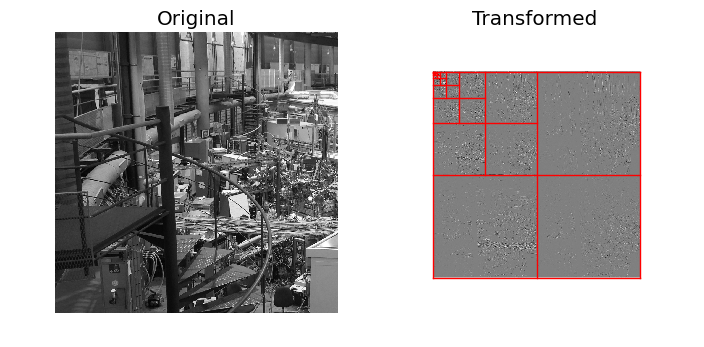

In [31]:
clf;
imageplot(f, "Original", 1,2,1);
subplot(1,2,2);
plot_wavelet(fW, Jmin); 
title("Transformed");

Inverse 2-D Wavelet transform.
------------------------------
Inversing the wavelet transform means retrieving a signal |f1| from the
coefficients |fW|. If |fW| are exactely the coefficients of |f|, then
|f=f1| up to machine precision.


Initialize the image to recover |f1| as the transformed coefficient, and
select the smallest possible scale.

In [32]:
f1 = copy(fW);
j = 0;

Select the sub-coefficient to transform.

In [33]:
A = f1[1:2^(j+1),1:2^(j+1)];

Retrieve coarse and detail coefficients in the vertical direction (you
can begin by the other direction, this has no importance).

In [34]:
Coarse = A[1:2^j,:];
Detail = A[2^j+1:2^(j+1),:];

Undo the transform by up-sampling and then dual filtering.

In [35]:
Coarse = cconvol(upsampling(Coarse,1),reverse(h),1);
Detail = cconvol(upsampling(Detail,1),reverse(g),1);

Recover the coefficient by summing.

In [36]:
A = Coarse + Detail;

Retrieve coarse and detail coefficients in the vertical direction (you
can begin by the other direction, this has no importance).

In [37]:
Coarse = A[:,1:2^j];
Detail = A[:,2^j+1:2^(j+1)];

Undo the transform by up-sampling and then dual filtering.

In [38]:
Coarse = cconvol(upsampling(Coarse,2),reverse(h),2);
Detail = cconvol(upsampling(Detail,2),reverse(g),2);

Recover the coefficient by summing.

In [39]:
A = Coarse + Detail;

Assign the result.

In [40]:
f1[1:2^(j+1),1:2^(j+1)] = A;


Now lets write the inverse wavelet transform that computes |f1| from the
coefficients |fW|. Compare |f1| with |f|.

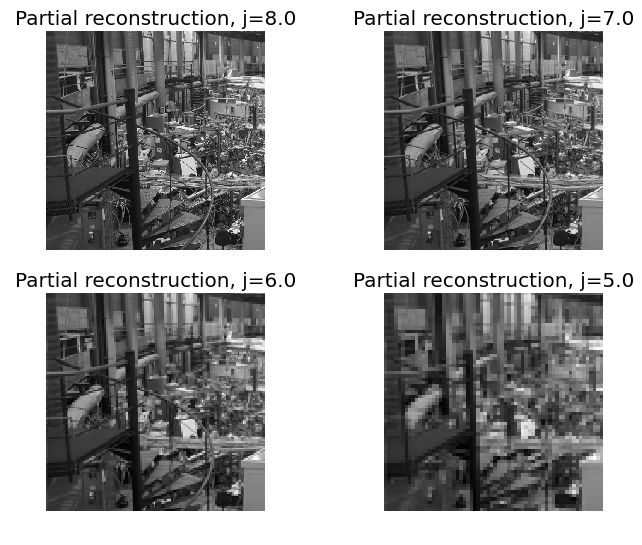

In [41]:
f1 = copy(fW);
clf;
for j=Jmin:Jmax
    A = f1[1:2^(j+1),1:2^(j+1)];
    for d=1:2
        if d==1
            Coarse = A[1:2^j,:];
            Detail = A[2^j+1:2^(j+1),:];
        else
            Coarse = A[:,1:2^j];
            Detail = A[:,2^j+1:2^(j+1)];                
        end
        Coarse = cconvol(upsampling(Coarse,d),reverse(h),d);
        Detail = cconvol(upsampling(Detail,d),reverse(g),d);
        A = Coarse + Detail;
        j1 = Jmax-j;
        if j1>0 && j1<5
            imageplot(A, "Partial reconstruction, j=$j", 2,2,j1);
        end
    end
    f1[1:2^(j+1),1:2^(j+1)] = A;
end

Check that we recover exactly the original image.

In [42]:
e = norm(f[:]-f1[:])/norm(f[:]);
print("Error |f-f1|/|f| = $e");

Error |f-f1|/|f| = 9.323119016065687e-12

Linear 2-D Wavelet Approximation
--------------------------------
Linear approximation is performed by setting to zero the fine scale wawelets coefficients
and then performing the inverse wavelet transform.


Here we keep only 1/16 of the wavelet coefficient, thus calculating an |m|
term approximation with |m=n^2/16|.

In [43]:
eta = 4;
fWLin = zeros(n,n);
fWLin[1:n/eta,1:n/eta] = fW[1:n/eta,1:n/eta];

Now, lets compute and display the linear approximation |fLin| obtained from the
coefficients |fWLin| by inverse wavelet transform.

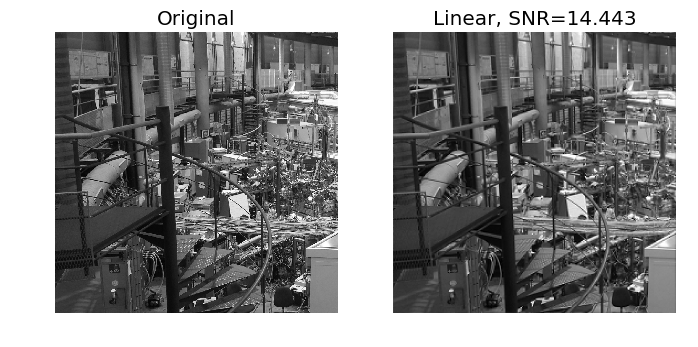

In [44]:
min = 1;
# forward transform
fW = perform_wavortho_transf(f,Jmin,+1,h);
# linear approximation
eta = 4;
fWLin = zeros(n,n);
fWLin[1:n/eta,1:n/eta] = fW[1:n/eta,1:n/eta];
# backward transform
fLin = perform_wavortho_transf(fWLin,Jmin,-1,h);
elin = snr(f,fLin);
# display
clf;
imageplot(f, "Original", 1,2,1); 
u = @sprintf("Linear, SNR=%.3f", elin);
imageplot(clamp(fLin), u, 1,2,2);


Non-Linear 2-D Wavelet Approximation
------------------------------------
A non-linear |m|-term approximation is obtained by keeping only the |m|
largest coefficients, which creates the smallest possible error.


Removing the smallest coefficient, to keep the |m|-largest, is
equivalently obtainedby thresholding the coefficients to
set to 0 the smallest coefficients.


First select a threshold value (the largest the threshold, the more
agressive the approximation).

In [45]:
T = .2;

Then set to 0 coefficients with magnitude below the threshold.

In [46]:
fWT = fW .* float(abs(fW).>T);

Display thresholded coefficients.

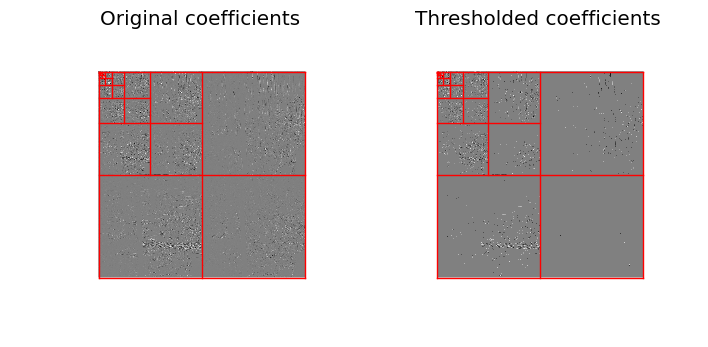

In [47]:
clf;
subplot(1,2,1);
plot_wavelet(fW,Jmin); 
title("Original coefficients");
subplot(1,2,2);
plot_wavelet(fWT,Jmin); 
title("Thresholded coefficients");


Now lets find the thresholds |T| so that the number |m| of remaining coefficients in
|fWT| are |m=n^2/16|. Use this threshold to compute |fWT| and then display
the corresponding approximation |Mnlin| of |f|. Compare this result with
the linear approximation.
umber of kept coefficients
ompute the threshold T
elect threshold
nverse transform
nverse
isplay

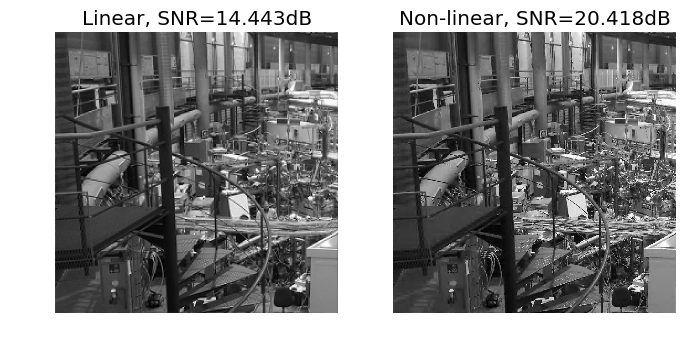

In [48]:
# number of kept coefficients
m = round(n^2/16); 
# compute the threshold T
Jmin = 1;
fW = perform_wavortho_transf(f,Jmin,+1, h); 
# select threshold
v = sort(abs(fW[:])); 
if v[1]<v[n^2]
    v = reverse(v);
end
# inverse transform
T = v[m];
fWT = fW .* (abs(fW).>T);
# inverse
fnlin = perform_wavortho_transf(fWT,Jmin,-1, h);
# display
clf;
u1 = @sprintf("Linear, SNR=%.3fdB", snr(f,fLin));
u2 = @sprintf("Non-linear, SNR=%.3fdB", snr(f,fnlin)); 
imageplot(clamp(fLin),u1, 1,2,1 );
imageplot(clamp(fnlin),u2, 1,2,2 );
